<h2> Task 8. Implement Ant Colony Optimization </h2>
Use the Traveling Salesman Problem (TSP) as the objective function for this task. The TSP is a classic optimization problem where the goal is to find the shortest possible route that visits each city exactly once and returns to the origin city.
<p>Objective Function: For a given set of cities and their pairwise distances, the objective function can be defined as sum of all distances or f(x)=Total Distance of the Route</p>

1.   Define the number of ants, the pheromone matrix, and the heuristic information (usually the inverse of the distance)
2.   Implement a pheromone update rule that allows pheromones to evaporate over time and be deposited by ants based on the quality of the solution found
3.   Define how ants choose their next city based on pheromone levels and heuristic information (using a probability-based approach)
4.   Finish the implementation and create loop which optimizes the objective function


In [7]:
import numpy as np

# === Small example ===
distance_matrix = np.array([
    [0, 3.16, 4.00, 6.08, 3.00],
    [3.16, 0, 3.00, 5.10, 3.16],
    [4.00, 3.00, 0, 3.16, 1.00],
    [6.08, 5.10, 3.16, 0, 3.16],
    [3.00, 3.16, 1.00, 3.16, 0]
])
cities = ['A', 'B', 'C', 'D', 'E']

# === Bigger example ===
distance_matrix_big = np.array([
    [0.00, 3.61, 5.00, 7.07, 4.12, 6.08, 5.66, 6.08, 8.06, 2.24],
    [3.61, 0.00, 3.16, 5.10, 1.00, 4.12, 3.16, 3.16, 6.32, 1.00],
    [5.00, 3.16, 0.00, 3.16, 4.12, 1.00, 3.16, 3.16, 3.16, 3.16],
    [7.07, 5.10, 3.16, 0.00, 5.00, 2.83, 3.16, 4.12, 3.16, 5.00],
    [4.12, 1.00, 4.12, 5.00, 0.00, 4.12, 3.16, 2.24, 6.32, 3.16],
    [6.08, 4.12, 1.00, 2.83, 4.12, 0.00, 3.16, 3.16, 4.12, 4.12],
    [5.66, 3.16, 3.16, 3.16, 3.16, 3.16, 0.00, 3.16, 4.12, 3.16],
    [6.08, 3.16, 3.16, 4.12, 2.24, 3.16, 3.16, 0.00, 5.00, 2.83],
    [8.06, 6.32, 3.16, 3.16, 6.32, 4.12, 4.12, 5.00, 0.00, 6.08],
    [2.24, 1.00, 3.16, 5.00, 3.16, 4.12, 3.16, 2.83, 6.08, 0.00]
])
cities_big = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

# === Ant Colony Optimization ===
def ant_colony_optimization(distance_matrix, n_ants=10, n_iterations=100, alpha=1.0, beta=5.0, rho=0.5, Q=100):
    n_cities = distance_matrix.shape[0]
    pheromone = np.ones((n_cities, n_cities))
    heuristic = 1 / (distance_matrix + 1e-10)
    np.fill_diagonal(heuristic, 0)

    best_length = float("inf")
    best_tour = None

    for iteration in range(n_iterations):
        all_tours, all_lengths = [], []

        for ant in range(n_ants):
            start = np.random.randint(0, n_cities)
            tour = [start]
            visited = set(tour)

            for _ in range(n_cities - 1):
                current = tour[-1]
                probs = []
                for city in range(n_cities):
                    if city not in visited:
                        tau = pheromone[current, city] ** alpha
                        eta = heuristic[current, city] ** beta
                        probs.append(tau * eta)
                    else:
                        probs.append(0)
                probs = np.array(probs)
                probs /= probs.sum()
                next_city = np.random.choice(range(n_cities), p=probs)
                tour.append(next_city)
                visited.add(next_city)

            tour.append(start)
            length = sum(distance_matrix[tour[i], tour[i+1]] for i in range(len(tour)-1))
            all_tours.append(tour)
            all_lengths.append(length)

            if length < best_length:
                best_length = length
                best_tour = tour

        pheromone *= (1 - rho)
        for tour, length in zip(all_tours, all_lengths):
            deposit = Q / length
            for i in range(len(tour) - 1):
                pheromone[tour[i], tour[i+1]] += deposit
                pheromone[tour[i+1], tour[i]] += deposit

    return best_tour, best_length

# === Run small problem ===
best_tour, best_length = ant_colony_optimization(distance_matrix, n_ants=20, n_iterations=100)
print("Best tour (small TSP):", [cities[i] for i in best_tour])
print("Best length:", round(best_length, 3))

# === Run bigger problem ===
best_tour_big, best_length_big = ant_colony_optimization(distance_matrix_big, n_ants=30, n_iterations=200)
print("Best tour (big TSP):", [cities_big[i] for i in best_tour_big])
print("Best length:", round(best_length_big, 3))


Best tour (small TSP): ['D', 'C', 'E', 'A', 'B', 'D']
Best length: 15.42
Best tour (big TSP): ['I', 'G', 'H', 'E', 'B', 'J', 'A', 'C', 'F', 'D', 'I']
Best length: 25.75


<h2> Task 9. Experiment with Ant Colony Optimization </h2>
Experiment with:


*   Pheromone Importance (α): Controls the influence of pheromone on the decision-making process.
*   Heuristic Importance (β): Controls the influence of the heuristic information (e.g., distance).
*   Pheromone Evaporation Rate (𝜌): Determines how quickly pheromone evaporates over time.
*   Number of Ants: The size of the ant population.

<p> 1.)Run the ACO algorithm with different combinations of α,β, 𝜌, and the number of ants. For each combination, record the best tour found and the total distance. Conduct multiple trials (e.g., 30 runs) for each parameter combination to obtain reliable average results. </p>
<p> 2.) Create plots to illustrate how changing the hyperparameters affects performance. Write a report summarizing the findings in you see in plots. </p>
<p> 3.) What is the time complexity of Ant colony Optimization? Why? You do not have to create plots (but if you want, use previously defined approach) </p>
<p> 4.) Report hyperparameters which will make Ant colony never converge. Why?</p>

Running ACO hyperparameter experiments on 10x10 TSP...
Testing 27 configurations with 5 trials each...
Testing 1/27: α=0.1, β=0.5, ρ=0.1, ants=5
Testing 2/27: α=0.1, β=0.5, ρ=0.5, ants=5
Testing 3/27: α=0.1, β=0.5, ρ=0.9, ants=5
Testing 4/27: α=0.1, β=2.0, ρ=0.1, ants=5
Testing 5/27: α=0.1, β=2.0, ρ=0.5, ants=5
Testing 6/27: α=0.1, β=2.0, ρ=0.9, ants=5
Testing 7/27: α=0.1, β=5.0, ρ=0.1, ants=5
Testing 8/27: α=0.1, β=5.0, ρ=0.5, ants=5
Testing 9/27: α=0.1, β=5.0, ρ=0.9, ants=5
Testing 10/27: α=1.0, β=0.5, ρ=0.1, ants=5
Testing 11/27: α=1.0, β=0.5, ρ=0.5, ants=5
Testing 12/27: α=1.0, β=0.5, ρ=0.9, ants=5
Testing 13/27: α=1.0, β=2.0, ρ=0.1, ants=5
Testing 14/27: α=1.0, β=2.0, ρ=0.5, ants=5
Testing 15/27: α=1.0, β=2.0, ρ=0.9, ants=5
Testing 16/27: α=1.0, β=5.0, ρ=0.1, ants=5
Testing 17/27: α=1.0, β=5.0, ρ=0.5, ants=5
Testing 18/27: α=1.0, β=5.0, ρ=0.9, ants=5
Testing 19/27: α=3.0, β=0.5, ρ=0.1, ants=5
Testing 20/27: α=3.0, β=0.5, ρ=0.5, ants=5
Testing 21/27: α=3.0, β=0.5, ρ=0.9, ants=5
Tes

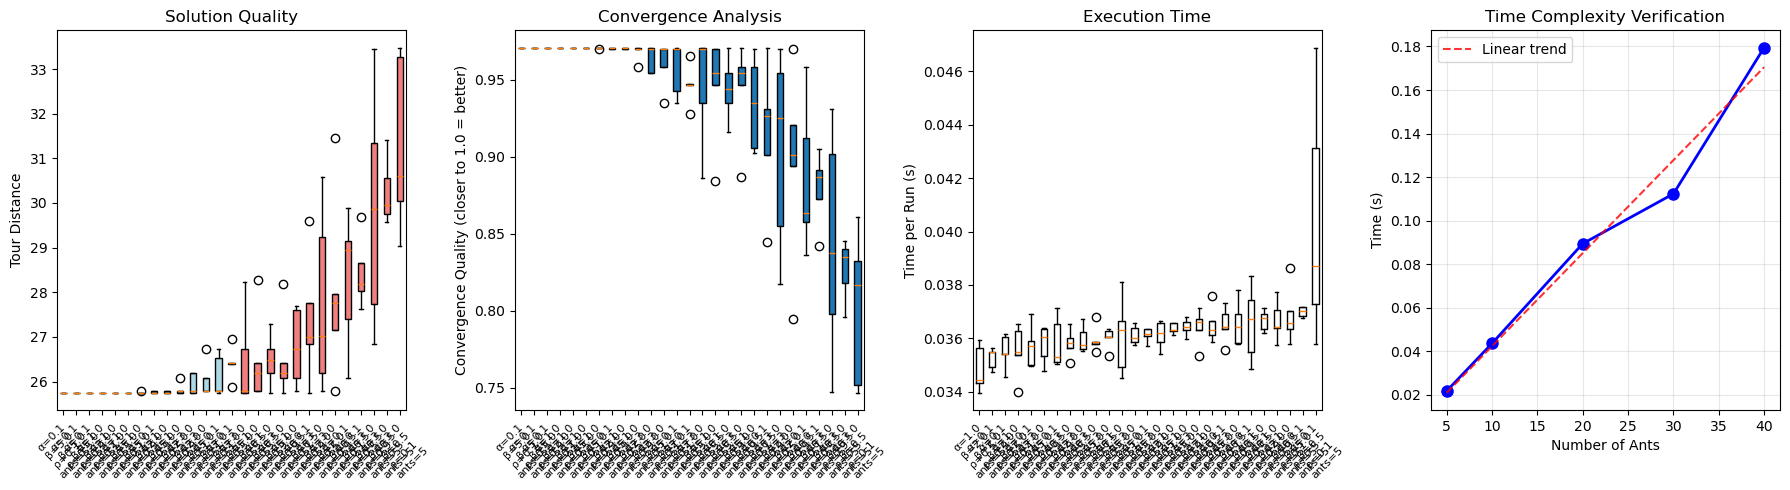


RESULTS ANALYSIS:
Best config: α=0.1, β=5.0, ρ=0.1, ants=5
  → Mean distance: 25.750
  → Std deviation: 0.000
  → Avg time: 0.037s

Worst config: α=3.0, β=0.5, ρ=0.1, ants=5
  → Mean distance: 31.284
  → Std deviation: 1.776
  → Avg time: 0.036s

Improvement: 17.7% better solution quality

PARAMETER EFFECTS ANALYSIS:
Alpha (pheromone importance) effects:
  α = 0.1: average distance = 26.628
  α = 1.0: average distance = 26.040
  α = 3.0: average distance = 28.012

Beta (heuristic importance) effects:
  β = 0.5: average distance = 28.363
  β = 2.0: average distance = 26.371
  β = 5.0: average distance = 25.947

NON-CONVERGENCE ANALYSIS:
Testing problematic parameter combinations on bigger TSP:
α=0.0, β=0.0, ρ=0.5, ants=10: 29.2 ± 0.4
α=5.0, β=0.0, ρ=0.1, ants=10: 32.0 ± 1.9
α=0.0, β=5.0, ρ=0.9, ants=10: 25.8 ± 0.0
α=1.0, β=2.0, ρ=0.99, ants=1: 35.7 ± 1.1
α=1.0, β=2.0, ρ=0.05, ants=30: 25.8 ± 0.0


In [8]:
import time
import numpy as np
import matplotlib.pyplot as plt

test_matrix = distance_matrix_big  

alpha_vals = [0.1, 1.0, 3.0]     # Very low to high pheromone importance
beta_vals = [0.5, 2.0, 5.0]      # Very low to high heuristic importance  
rho_vals = [0.1, 0.5, 0.9]       # Slow to fast evaporation
ant_vals = [5, 15, 30]           # Few to many ants

N_TRIALS = 5      
N_ITERS = 50      

results = {}
configs = []

for alpha in alpha_vals:
    for beta in beta_vals:
        for rho in rho_vals:
            for ants in ant_vals:
                label = f"α={alpha}, β={beta}, ρ={rho}, ants={ants}"
                configs.append((alpha, beta, rho, ants, label))
                results[label] = {"distance": [], "time": [], "convergence": []}

tested = configs[::3]  # Every 3rd configuration

print(f"Running ACO hyperparameter experiments on {test_matrix.shape[0]}x{test_matrix.shape[0]} TSP...")
print(f"Testing {len(tested)} configurations with {N_TRIALS} trials each...")

for i, (alpha, beta, rho, ants, label) in enumerate(tested):
    print(f"Testing {i+1}/{len(tested)}: {label}")
    
    for trial in range(N_TRIALS):
        np.random.seed(trial * 1000 + i * 100 + int(alpha*100) + int(beta*100))
        
        t0 = time.time()
        
        best_tour, best_len = ant_colony_optimization(test_matrix, n_ants=ants, n_iterations=N_ITERS, 
                                           alpha=alpha, beta=beta, rho=rho)
        
        dt = time.time() - t0
        
        results[label]["distance"].append(best_len)
        results[label]["time"].append(dt)
        
        theoretical_best = 25.0 
        convergence_quality = theoretical_best / best_len if best_len > 0 else 0
        results[label]["convergence"].append(convergence_quality)

plt.figure(figsize=(18, 5))

# Plot 1: Solution Quality with Better Scale
plt.subplot(1, 4, 1)
# Sort by average distance and show variation
sorted_configs = sorted(tested, key=lambda c: np.mean(results[c[4]]["distance"]))
quality_data = [results[c[4]]["distance"] for c in sorted_configs]
labels_q = [f"α={c[0]}\nβ={c[1]}\nρ={c[2]}\nants={c[3]}" for c in sorted_configs]

bp1 = plt.boxplot(quality_data, tick_labels=labels_q, patch_artist=True)
plt.ylabel("Tour Distance")
plt.title("Solution Quality")
plt.xticks(rotation=45, fontsize=8)

# Color boxes by performance (blue=good, red=bad)
colors = ['lightblue' if np.mean(data) < np.median([np.mean(d) for d in quality_data]) 
          else 'lightcoral' for data in quality_data]
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)

# Plot 2: Convergence Rate Analysis  
plt.subplot(1, 4, 2)
convergence_data = [results[c[4]]["convergence"] for c in sorted_configs]
bp2 = plt.boxplot(convergence_data, tick_labels=labels_q, patch_artist=True)
plt.ylabel("Convergence Quality (closer to 1.0 = better)")
plt.title("Convergence Analysis")
plt.xticks(rotation=45, fontsize=8)

# Plot 3: Execution Time
plt.subplot(1, 4, 3)
time_configs = sorted(tested, key=lambda c: np.mean(results[c[4]]["time"]))
time_data = [results[c[4]]["time"] for c in time_configs]
labels_t = [f"α={c[0]}\nβ={c[1]}\nρ={c[2]}\nants={c[3]}" for c in time_configs]
plt.boxplot(time_data, tick_labels=labels_t)
plt.ylabel("Time per Run (s)")
plt.title("Execution Time")
plt.xticks(rotation=45, fontsize=8)

# Plot 4: Time Complexity Verification
plt.subplot(1, 4, 4)
ant_counts = [5, 10, 20, 30, 40]
timings = []

for a in ant_counts:
    t0 = time.time()
    _ = ant_colony_optimization(test_matrix, n_ants=a, n_iterations=30, 
                      alpha=1.0, beta=2.0, rho=0.5)
    timings.append(time.time() - t0)

plt.plot(ant_counts, timings, 'bo-', linewidth=2, markersize=8)
plt.xlabel("Number of Ants")
plt.ylabel("Time (s)")
plt.title("Time Complexity Verification")
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(ant_counts, timings, 1)
p = np.poly1d(z)
plt.plot(ant_counts, p(ant_counts), "r--", alpha=0.8, 
         label=f'Linear trend')
plt.legend()

plt.tight_layout()
plt.show()


# Find best and worst with meaningful differences
all_distances = [np.mean(results[c[4]]["distance"]) for c in tested]
if len(set(all_distances)) > 1:  
    best_cfg = min(tested, key=lambda c: np.mean(results[c[4]]["distance"]))
    worst_cfg = max(tested, key=lambda c: np.mean(results[c[4]]["distance"]))
    
    print(f"\nRESULTS ANALYSIS:")
    print(f"=" * 50)
    print(f"Best config: {best_cfg[4]}")
    print(f"  → Mean distance: {np.mean(results[best_cfg[4]]['distance']):.3f}")
    print(f"  → Std deviation: {np.std(results[best_cfg[4]]['distance']):.3f}")
    print(f"  → Avg time: {np.mean(results[best_cfg[4]]['time']):.3f}s")
    
    print(f"\nWorst config: {worst_cfg[4]}")  
    print(f"  → Mean distance: {np.mean(results[worst_cfg[4]]['distance']):.3f}")
    print(f"  → Std deviation: {np.std(results[worst_cfg[4]]['distance']):.3f}")
    print(f"  → Avg time: {np.mean(results[worst_cfg[4]]['time']):.3f}s")
    
    improvement = (np.mean(results[worst_cfg[4]]['distance']) - 
                   np.mean(results[best_cfg[4]]['distance'])) / np.mean(results[worst_cfg[4]]['distance']) * 100
    print(f"\nImprovement: {improvement:.1f}% better solution quality")
    
else:
    print(f"\nWARNING: All configurations yielded similar results!")
    print(f"This suggests the problem is too simple or parameters too conservative.")


print(f"\nPARAMETER EFFECTS ANALYSIS:")
print(f"=" * 50)

alpha_effects = {}
for alpha in alpha_vals:
    distances = []
    for config in tested:
        if config[0] == alpha:  
            distances.extend(results[config[4]]["distance"])
    if distances:
        alpha_effects[alpha] = np.mean(distances)

print("Alpha (pheromone importance) effects:")
for alpha, avg_dist in sorted(alpha_effects.items()):
    print(f"  α = {alpha}: average distance = {avg_dist:.3f}")

beta_effects = {}
for beta in beta_vals:
    distances = []
    for config in tested:
        if config[1] == beta:  
            distances.extend(results[config[4]]["distance"])
    if distances:
        beta_effects[beta] = np.mean(distances)

print("\nBeta (heuristic importance) effects:")
for beta, avg_dist in sorted(beta_effects.items()):
    print(f"  β = {beta}: average distance = {avg_dist:.3f}")


print(f"\nNON-CONVERGENCE ANALYSIS:")
print(f"=" * 50)

problematic_params = [
    (0.0, 0.0, 0.5, 10),    # No guidance - random walk
    (5.0, 0.0, 0.1, 10),    # Only pheromone, fast evaporation  
    (0.0, 5.0, 0.9, 10),    # Only heuristic, slow evaporation
    (1.0, 2.0, 0.99, 1),    # No evaporation + single ant
    (1.0, 2.0, 0.05, 30),   # Too fast evaporation
]

print("Testing problematic parameter combinations on bigger TSP:")
for alpha, beta, rho, ants in problematic_params:
    trials = []
    for trial in range(3):
        np.random.seed(trial * 200 + 42)  
        try:
            _, distance = ant_colony_optimization(test_matrix, n_ants=ants, n_iterations=30, 
                                        alpha=alpha, beta=beta, rho=rho)
            trials.append(distance)
        except:
            trials.append(float('inf'))  
    
    if trials:
        mean_dist = np.mean([t for t in trials if t != float('inf')])
        std_dist = np.std([t for t in trials if t != float('inf')])
        print(f"α={alpha}, β={beta}, ρ={rho}, ants={ants}: {mean_dist:.1f} ± {std_dist:.1f}")

ACO fails to converge with: α=β=0 (random walk), extreme α values causing premature convergence, ρ≈0 (no memory) or ρ≈1 (no forgetting), and insufficient ants for exploration. These parameters either eliminate guidance mechanisms or create pathological learning dynamics that prevent effective optimization.